In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
print(sys.executable)


C:\Users\Sinam\anaconda3\python.exe


In [2]:
train = pd.read_csv(r'sales_train.csv')
items = pd.read_csv(r'items.csv')
categories = pd.read_csv(r'item_categories.csv')
shops = pd.read_csv(r'shops.csv')
test = pd.read_csv(r'test.csv')
submission = pd.read_csv(r'sample_submission.csv')

In [3]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [5]:
train.shape

(2935849, 6)

In [6]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [7]:
test.shape

(214200, 3)

In [8]:
submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


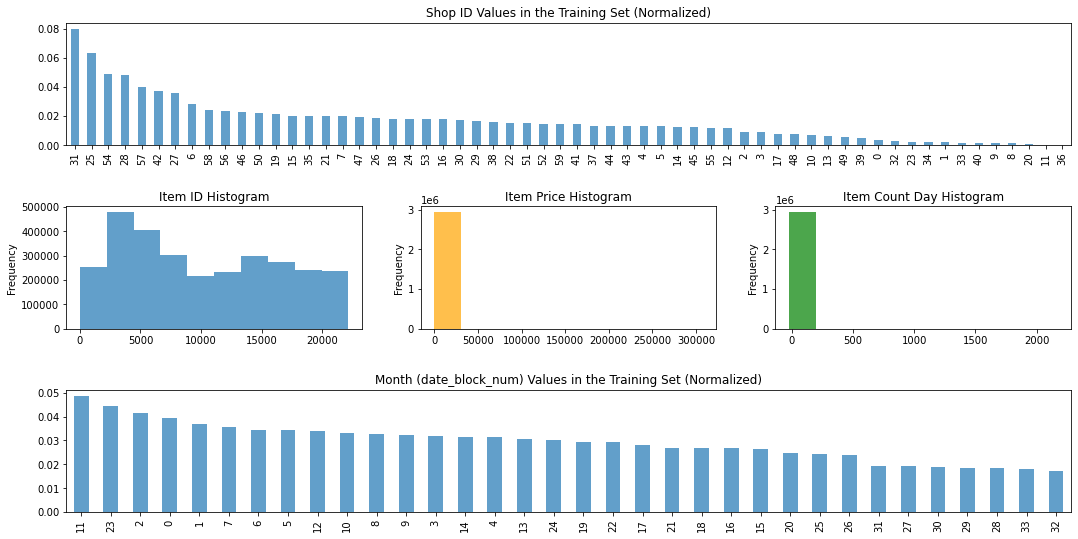

In [9]:
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
train['shop_id'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Shop ID Values in the Training Set (Normalized)')

plt.subplot2grid((3,3), (1,0))
train['item_id'].plot(kind='hist', alpha=0.7)
plt.title('Item ID Histogram')

plt.subplot2grid((3,3), (1,1))
train['item_price'].plot(kind='hist', alpha=0.7, color='orange')
plt.title('Item Price Histogram')

plt.subplot2grid((3,3), (1,2))
train['item_cnt_day'].plot(kind='hist', alpha=0.7, color='green')
plt.title('Item Count Day Histogram')

plt.subplot2grid((3,3), (2,0), colspan = 3)
train['date_block_num'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Month (date_block_num) Values in the Training Set (Normalized)')

plt.show()

In [10]:
train['item_id'].value_counts(ascending=False)[:5]

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
Name: item_id, dtype: int64

In [11]:
items.loc[items['item_id']==20949]

,item_name,item_id,item_category_id
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71


In [12]:
categories.loc[categories['item_category_id']==71]

,item_category_name,item_category_id
71,"Подарки - Сумки, Альбомы, Коврики д/мыши",71


In [13]:
test.loc[test['item_id']==20949].head(5)

,ID,shop_id,item_id
460,460,5,20949
5560,5560,4,20949
10660,10660,6,20949
15760,15760,3,20949
20860,20860,2,20949


In [14]:
train['item_cnt_day'].sort_values(ascending=False)[:5]

2909818    2169.0
2326930    1000.0
2864235     669.0
2851091     637.0
2608040     624.0
Name: item_cnt_day, dtype: float64

In [15]:
train[train['item_cnt_day'] == 2169]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,28.10.2015,33,12,11373,0.908714,2169.0


In [16]:
items[items['item_id'] == 11373]

,item_name,item_id,item_category_id
11373,Доставка до пункта выдачи (Boxberry),11373,9


In [17]:
train[train['item_id'] == 11373].head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
58323,08.01.2013,0,12,11373,1000.0,1.0
58324,31.01.2013,0,12,11373,97.8,5.0
176790,01.02.2013,1,12,11373,229.0,1.0
176791,04.02.2013,1,12,11373,130.0,1.0
302468,29.03.2013,2,12,11373,139.5,2.0


In [18]:
train = train[train['item_cnt_day'] < 2000]

In [19]:
train['item_price'].sort_values(ascending=False)[:5]

1163158    307980.0
885138      59200.0
1488135     50999.0
2327159     49782.0
2917760     42990.0
Name: item_price, dtype: float64

In [20]:
train[train['item_price'] == 307980]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [21]:
items[items['item_id'] == 6066]

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


In [22]:
train[train['item_id'] == 6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [23]:
train = train[train['item_price'] < 300000]

In [24]:
train['item_price'].sort_values()[:5]

484683   -1.0000
608763    0.0700
579766    0.0700
611400    0.0875
673155    0.0900
Name: item_price, dtype: float64

In [25]:
train[train['item_price'] == -1]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [26]:
train[train['item_id'] == 2973].head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
352,15.01.2013,0,25,2973,2499.0,13.0
353,16.01.2013,0,25,2973,2499.0,5.0
354,17.01.2013,0,25,2973,2499.0,3.0
355,18.01.2013,0,25,2973,2499.0,2.0
356,19.01.2013,0,25,2973,2499.0,3.0


In [27]:
price_correction = train[(train['shop_id'] == 32) & (train['item_id'] == 2973)
                         & (train['date_block_num'] == 4) & (train['item_price'] > 0)].item_price.median()
train.loc[train['item_price'] < 0, 'item_price'] = price_correction

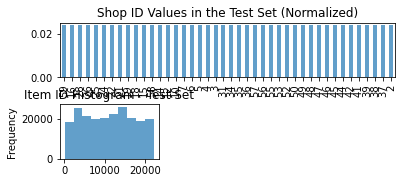

In [28]:
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
test['shop_id'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Shop ID Values in the Test Set (Normalized)')

plt.subplot2grid((3,3), (1,0))
test['item_id'].plot(kind='hist', alpha=0.7)
plt.title('Item ID Histogram - Test Set')

plt.show()

# Shops analysis

In [29]:
shops_train = train['shop_id'].nunique()
shops_test = test['shop_id'].nunique()
print('Shops in Training Set: ', shops_train)
print('Shops in Test Set: ', shops_test)

Shops in Training Set:  60
Shops in Test Set:  42


In [30]:
shops_train_list = list(train['shop_id'].unique())
shops_test_list = list(test['shop_id'].unique())

flag = 0
if(set(shops_test_list).issubset(set(shops_train_list))): 
    flag = 1
      
if (flag) : 
    print ("Yes, list is subset of other.") 
else : 
    print ("No, list is not subset of other.") 

Yes, list is subset of other.


In [31]:
shops.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
shop_name,"!Якутск Орджоникидзе, 56 фран","!Якутск ТЦ ""Центральный"" фран","Адыгея ТЦ ""Мега""","Балашиха ТРК ""Октябрь-Киномир""","Волжский ТЦ ""Волга Молл""","Вологда ТРЦ ""Мармелад""","Воронеж (Плехановская, 13)","Воронеж ТРЦ ""Максимир""","Воронеж ТРЦ Сити-Парк ""Град""",Выездная Торговля,...,"Тюмень ТЦ ""Гудвин""","Тюмень ТЦ ""Зеленый Берег""","Уфа ТК ""Центральный""","Уфа ТЦ ""Семья"" 2","Химки ТЦ ""Мега""",Цифровой склад 1С-Онлайн,"Чехов ТРЦ ""Карнавал""","Якутск Орджоникидзе, 56","Якутск ТЦ ""Центральный""","Ярославль ТЦ ""Альтаир"""
shop_id,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59


In [32]:
train.loc[train['shop_id'] == 0, 'shop_id'] = 57
test.loc[test['shop_id'] == 0, 'shop_id'] = 57

train.loc[train['shop_id'] == 1, 'shop_id'] = 58
test.loc[test['shop_id'] == 1, 'shop_id'] = 58

train.loc[train['shop_id'] == 10, 'shop_id'] = 11
test.loc[test['shop_id'] == 10, 'shop_id'] = 11

In [33]:
#Extracting cities
cities = shops['shop_name'].str.split(' ').map(lambda row: row[0])
cities.unique()

array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Якутск', 'Ярославль'], dtype=object)

In [34]:
shops['city'] = shops['shop_name'].str.split(' ').map(lambda row: row[0])
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'

In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit_transform(shops['city'])

array([29, 29,  0,  1,  2,  3,  4,  4,  4,  5,  6,  6,  7,  8,  8,  9, 10,
       11, 11, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14,
       15, 15, 16, 16, 17, 18, 18, 18, 19, 19, 20, 20, 21, 22, 23, 24, 24,
       24, 25, 25, 26, 27, 28, 29, 29, 30])

In [36]:
shops['city_label'] = le.fit_transform(shops['city'])
shops.drop(['shop_name', 'city'], axis = 1, inplace = True)
shops.head()

,shop_id,city_label
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


# Items analysis

In [37]:
items_train = train['item_id'].nunique()
items_test = test['item_id'].nunique()
print('Items in Training Set: ', items_train)
print('Items in Test Set: ', items_test)

Items in Training Set:  21806
Items in Test Set:  5100


In [38]:
items_train_list = list(train['item_id'].unique())
items_test_list = list(test['item_id'].unique())

flag = 0
if(set(items_test_list).issubset(set(items_train_list))): 
    flag = 1
      
if (flag) : 
    print ("Yes, list is subset of other.") 
else : 
    print ("No, list is not subset of other.") 

No, list is not subset of other.


In [39]:
len(set(items_test_list).difference(items_train_list))

363

In [40]:
categories_in_test = items.loc[items['item_id'].isin(sorted(test['item_id'].unique()))].item_category_id.unique()

In [41]:
categories.loc[~categories['item_category_id'].isin(categories_in_test)].T

,1,4,8,10,13,14,17,18,32,39,...,50,51,52,53,59,66,68,80,81,82
item_category_name,Аксессуары - PS2,Аксессуары - PSP,Билеты (Цифра),Игровые консоли - PS2,Игровые консоли - PSP,Игровые консоли - PSVita,Игровые консоли - Прочие,Игры - PS2,"Карты оплаты (Кино, Музыка, Игры)",Кино - Blu-Ray 4K,...,Книги - Открытки,Книги - Познавательная литература,Книги - Путеводители,Книги - Художественная литература,Музыка - Музыкальное видео,"Подарки - Открытки, наклейки","Подарки - Сертификаты, услуги",Служебные - Билеты,Чистые носители (шпиль),Чистые носители (штучные)
item_category_id,1,4,8,10,13,14,17,18,32,39,...,50,51,52,53,59,66,68,80,81,82


In [42]:
le = preprocessing.LabelEncoder()

main_categories = categories['item_category_name'].str.split('-')
categories['main_category_id'] = main_categories.map(lambda row: row[0].strip())
categories['main_category_id'] = le.fit_transform(categories['main_category_id'])

# Some items don't have sub-categories. For those, we will use the main category as a sub-category
categories['sub_category_id'] = main_categories.map(lambda row: row[1].strip() if len(row) > 1 else row[0].strip())
categories['sub_category_id'] = le.fit_transform(categories['sub_category_id'])

In [43]:
categories.head()

,item_category_name,item_category_id,main_category_id,sub_category_id
0,PC - Гарнитуры/Наушники,0,0,29
1,Аксессуары - PS2,1,1,9
2,Аксессуары - PS3,2,1,10
3,Аксессуары - PS4,3,1,11
4,Аксессуары - PSP,4,1,13


# Generating product of Shop-Item pairs for each month in the training data

In [44]:
train['date'] =  pd.to_datetime(train['date'], format='%d.%m.%Y')
from itertools import product

In [45]:
# Testing generation of cartesian product for the month of January in 2013

shops_in_jan = train.loc[train['date_block_num']==0, 'shop_id'].unique()
items_in_jan = train.loc[train['date_block_num']==0, 'item_id'].unique()
jan = list(product(*[shops_in_jan, items_in_jan, [0]]))

In [46]:
print(len(jan))

365175


In [47]:
# Testing generation of cartesian product for the month of February in 2013

shops_in_feb = train.loc[train['date_block_num']==1, 'shop_id'].unique()
items_in_feb = train.loc[train['date_block_num']==1, 'item_id'].unique()
feb = list(product(*[shops_in_feb, items_in_feb, [1]]))

In [48]:
print(len(feb))

375728


In [49]:
cartesian_test = []
cartesian_test.append(np.array(jan))
cartesian_test.append(np.array(feb))
cartesian_test

[array([[   59, 22154,     0],
        [   59,  2552,     0],
        [   59,  2554,     0],
        ...,
        [   45,   628,     0],
        [   45,   631,     0],
        [   45,   621,     0]], dtype=int64),
 array([[   50,  3880,     1],
        [   50,  4128,     1],
        [   50,  4124,     1],
        ...,
        [   28, 12885,     1],
        [   28, 12791,     1],
        [   28, 13433,     1]], dtype=int64)]

In [50]:
cartesian_test = np.vstack(cartesian_test)
cartesian_test_df = pd.DataFrame(cartesian_test, columns = ['shop_id', 'item_id', 'date_block_num'])
cartesian_test_df.head()

,shop_id,item_id,date_block_num
0,59,22154,0
1,59,2552,0
2,59,2554,0
3,59,2555,0
4,59,2564,0


In [51]:
cartesian_test_df.shape

(740903, 3)

In [52]:
from tqdm import tqdm_notebook
def downcast_dtypes(df):
    '''
        Changes column types in the dataframe: 
                
                `float64` type to `float32`
                `int64`   type to `int32`
    '''
    
    # Select columns to downcast
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols =   [c for c in df if df[c].dtype == "int64"]
    
    # Downcast
    df[float_cols] = df[float_cols].astype(np.float16)
    df[int_cols]   = df[int_cols].astype(np.int16)
    
    return df

In [53]:
months = train['date_block_num'].unique()
cartesian = []
for month in months:
    shops_in_month = train.loc[train['date_block_num']==month, 'shop_id'].unique()
    items_in_month = train.loc[train['date_block_num']==month, 'item_id'].unique()
    cartesian.append(np.array(list(product(*[shops_in_month, items_in_month, [month]])), dtype='int32'))
    cartesian_df = pd.DataFrame(np.vstack(cartesian), columns = ['shop_id', 'item_id', 'date_block_num'], dtype=np.int32)
cartesian_df.shape

(10913804, 3)

# Aggregating sales to a monthly level and clipping target variable

In [54]:
x = train.groupby(['shop_id', 'item_id', 'date_block_num'])['item_cnt_day'].sum().rename('item_cnt_month').reset_index()
x.head()

,shop_id,item_id,date_block_num,item_cnt_month
0,2,27,0,1.0
1,2,27,17,1.0
2,2,30,2,1.0
3,2,30,5,1.0
4,2,30,15,1.0


In [55]:
x.shape

(1609123, 4)

In [56]:
new_train = pd.merge(cartesian_df, x, on=['shop_id', 'item_id', 'date_block_num'], how='left').fillna(0)
new_train['item_cnt_month'] = np.clip(new_train['item_cnt_month'], 0, 20)

In [57]:
del x
del cartesian_df
del cartesian
del cartesian_test
del cartesian_test_df
del feb
del jan
del items_test_list
del items_train_list
del train

In [58]:
new_train.sort_values(['date_block_num','shop_id','item_id'], inplace = True)
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month
114910,2,19,0,0.0
117150,2,27,0,1.0
120623,2,28,0,0.0
118316,2,29,0,0.0
114602,2,32,0,0.0


# Appending Test Set to Training Set

In [59]:
test.insert(loc=3, column='date_block_num', value=34)
test['item_cnt_month'] = 0
test.head()

,ID,shop_id,item_id,date_block_num,item_cnt_month
0,0,5,5037,34,0
1,1,5,5320,34,0
2,2,5,5233,34,0
3,3,5,5232,34,0
4,4,5,5268,34,0


In [60]:
new_train = new_train.append(test.drop('ID', axis = 1))
new_train = pd.merge(new_train, shops, on=['shop_id'], how='left')
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,city_label
0,2,19,0,0.0,0
1,2,27,0,1.0,0
2,2,28,0,0.0,0
3,2,29,0,0.0,0
4,2,32,0,0.0,0


In [61]:
new_train = pd.merge(new_train, items.drop('item_name', axis = 1), on=['item_id'], how='left')
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,city_label,item_category_id
0,2,19,0,0.0,0,40
1,2,27,0,1.0,0,19
2,2,28,0,0.0,0,30
3,2,29,0,0.0,0,23
4,2,32,0,0.0,0,40


In [62]:
new_train = pd.merge(new_train, categories.drop('item_category_name', axis = 1), on=['item_category_id'], how='left')
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,city_label,item_category_id,main_category_id,sub_category_id
0,2,19,0,0.0,0,40,11,4
1,2,27,0,1.0,0,19,5,10
2,2,28,0,0.0,0,30,8,55
3,2,29,0,0.0,0,23,5,16
4,2,32,0,0.0,0,40,11,4


# Generating Lag Features and Mean-Encodings

In [63]:
def generate_lag(train, months, lag_column):
    for month in months:
        # Speed up by grabbing only the useful bits
        train_shift = train[['date_block_num', 'shop_id', 'item_id', lag_column]].copy()
        train_shift.columns = ['date_block_num', 'shop_id', 'item_id', lag_column+'_lag_'+ str(month)]
        train_shift['date_block_num'] += month
        train = pd.merge(train, train_shift, on=['date_block_num', 'shop_id', 'item_id'], how='left')
    return train

In [64]:
del items
del categories
del shops
del test

In [65]:
new_train = downcast_dtypes(new_train)
import gc
gc.collect()

77

In [66]:
%%time
new_train = generate_lag(new_train, [1,2,3,4,5,6,12], 'item_cnt_month')

Wall time: 1min 40s


In [67]:
%%time
group = new_train.groupby(['date_block_num', 'item_id'])['item_cnt_month'].mean().rename('item_month_mean').reset_index()
new_train = pd.merge(new_train, group, on=['date_block_num', 'item_id'], how='left')
new_train = generate_lag(new_train, [1,2,3,6,12], 'item_month_mean')
new_train.drop(['item_month_mean'], axis=1, inplace=True)

Wall time: 1min 21s


In [68]:
%%time
group = new_train.groupby(['date_block_num', 'shop_id'])['item_cnt_month'].mean().rename('shop_month_mean').reset_index()
new_train = pd.merge(new_train, group, on=['date_block_num', 'shop_id'], how='left')
new_train = generate_lag(new_train, [1,2,3,6,12], 'shop_month_mean')
new_train.drop(['shop_month_mean'], axis=1, inplace=True)

Wall time: 1min 16s


In [69]:
new_train.tail()

,shop_id,item_id,date_block_num,item_cnt_month,city_label,item_category_id,main_category_id,sub_category_id,item_cnt_month_lag_1,item_cnt_month_lag_2,...,item_month_mean_lag_1,item_month_mean_lag_2,item_month_mean_lag_3,item_month_mean_lag_6,item_month_mean_lag_12,shop_month_mean_lag_1,shop_month_mean_lag_2,shop_month_mean_lag_3,shop_month_mean_lag_6,shop_month_mean_lag_12
11127999,45,18454,34,0.0,20,55,13,2,1.0,0.0,...,0.045441,0.023254,0.071411,0.590820,NaN,0.126709,0.128784,0.139038,0.137573,NaN
11128000,45,16188,34,0.0,20,64,14,42,0.0,0.0,...,0.022720,0.069763,NaN,NaN,NaN,0.126709,0.128784,NaN,NaN,NaN
11128001,45,15757,34,0.0,20,55,13,2,0.0,0.0,...,0.113647,0.069763,0.095215,0.250000,0.180054,0.126709,0.128784,0.139038,0.137573,0.181274
11128002,45,19648,34,0.0,20,40,11,4,0.0,0.0,...,0.045441,0.069763,0.166626,0.090881,NaN,0.126709,0.128784,0.139038,0.137573,NaN
11128003,45,969,34,0.0,20,37,11,1,0.0,0.0,...,0.068176,0.116272,0.023804,0.068176,0.119995,0.126709,0.128784,0.139038,0.137573,0.181274


In [70]:
new_train['month'] = new_train['date_block_num'] % 12

In [71]:
holiday_dict = {
    0: 6,
    1: 3,
    2: 2,
    3: 8,
    4: 3,
    5: 3,
    6: 2,
    7: 8,
    8: 4,
    9: 8,
    10: 5,
    11: 4,
}

In [72]:
new_train['holidays_in_month'] = new_train['month'].map(holiday_dict)

In [73]:
moex = {
    12: 659, 13: 640, 14: 1231,
    15: 881, 16: 764, 17: 663,
    18: 743, 19: 627, 20: 692,
    21: 736, 22: 680, 23: 1092,
    24: 657, 25: 863, 26: 720,
    27: 819, 28: 574, 29: 568,
    30: 633, 31: 658, 32: 611,
    33: 770, 34: 723,
}

In [74]:
new_train['moex_value'] = new_train.date_block_num.map(moex)
new_train = downcast_dtypes(new_train)

# Training

In [75]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [76]:
conda install py-xgboost

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed

Note: you may need to restart the kernel to use updated packages.



Examining py-xgboost:  67%|######6   | 2/3 [00:00<00:00, 21.75it/s]  
                                                                   

Examining conflict for python py-xgboost:  33%|###3      | 1/3 [00:00<?, ?it/s]
                                                                               

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - py-xgboost -> python[version='>=2.7,<2.8.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.5,<3.6.0a0']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.

The following specifications were found to be incompatible with your 

In [77]:
new_train = new_train[new_train.date_block_num > 11]
import gc
gc.collect()

60

In [78]:
def fill_na(df):
    for col in df.columns:
        if ('_lag_' in col) & (df[col].isnull().any()):
            df[col].fillna(0, inplace=True)         
    return df

new_train = fill_na(new_train)

In [79]:
 import xgboost as xgb

In [87]:
def xgtrain():
    regressor = xgb.XGBRegressor(n_estimators = 100,
                                 learning_rate = 0.01,
                                 max_depth = 10,
                                 subsample = 0.5,
                                 colsample_bytree = 0.5)
    
    regressor_ = regressor.fit(new_train[new_train.date_block_num < 33].drop(['item_cnt_month'], axis=1).values, 
                               new_train[new_train.date_block_num < 33]['item_cnt_month'].values, 
                               eval_metric = 'rmse', 
                               eval_set = [(new_train[new_train.date_block_num < 33].drop(['item_cnt_month'], axis=1).values, 
                                            new_train[new_train.date_block_num < 33]['item_cnt_month'].values), 
                                           (new_train[new_train.date_block_num == 33].drop(['item_cnt_month'], axis=1).values, 
                                            new_train[new_train.date_block_num == 33]['item_cnt_month'].values)
                                          ], 
                               verbose=True,
                               early_stopping_rounds = 10,
                              )
    return regressor

In [88]:
%%time
regressor_ = xgtrain()

[13:52:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\gbm\gbtree.cc:139: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-rmse:1.20389	validation_1-rmse:1.15805
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.19993	validation_1-rmse:1.15421
[2]	validation_0-rmse:1.19614	validation_1-rmse:1.15034
[3]	validation_0-rmse:1.19155	validation_1-rmse:1.14660
[4]	validation_0-rmse:1.18788	validation_1-rmse:1.14366
[5]	validation_0-rmse:1.18434	validation_1-rmse:1.14016
[6]	validation_0-rmse:1.18103	validation_1-rmse:1.13716
[7]	validation_0-rmse:1.17421	validation_1-rmse:1.13323
[8]	validation_0-rmse:1.16927	validation_1-rmse:1.12976
[9]	validation_0-rmse:1.16556	validation_1-rmse:1.12668
[10]	validatio

In [89]:
predictions = regressor_.predict(new_train[new_train.date_block_num == 34].drop(['item_cnt_month'], axis = 1).values)

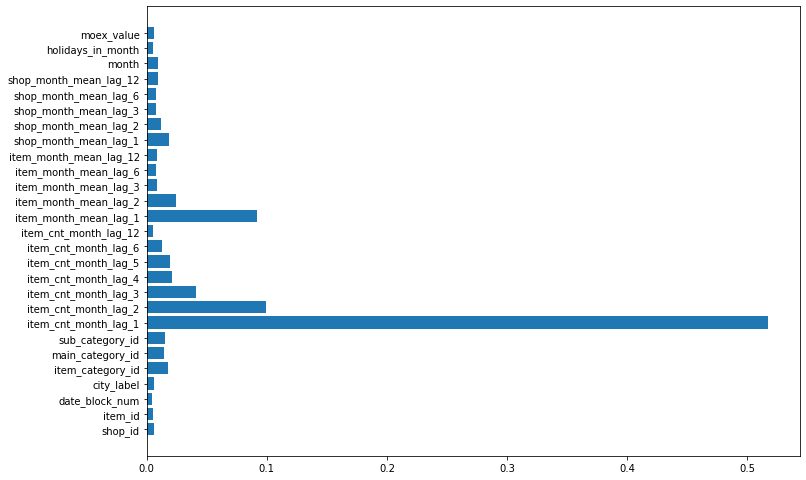

In [90]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
cols = new_train.drop('item_cnt_month', axis = 1).columns
plt.barh(cols, regressor_.feature_importances_)
plt.show()

In [91]:
submission['item_cnt_month'] = predictions

In [92]:
submission.to_csv('sales_prediction_Saida.csv', index=False)